# **Chapter 4 - THE PRELIMINARIES: A CRASHCOURSE**

## **4.4 Probability and Statistics**

#### **4.4.1 Basic probability theory**

#### Summary : 주사위 예제로 확률을 구해보는 내용

- 육면체 주사위는 1,2,3 ...6 의 6가지 사건이 존재하고, 일반적으로 각 눈금이 나올 확률은 1/6

- 공장에서 갇 나온 육면체 주사위는 비정상적인 주사위인지는 알지 못한다.<br>
  **유일한 확인 방법은 여러번 주사위를 굴려가며 그 결과를 기록하여 조사하는 것이다.**

- 기본적인 접근 방법은 각 눈금의 누적 횟수를 총 굴린 횟수로 나누는 방법. 이 방법으로 확률을 추정할 수 있다.<br>
  **대수의 법칙** 에 따라, 던진 횟수가 많아질수록 우리가 처음에 가정한 확률에 가까워질 것이다.<br>
  

- **대수의 법칙** : 모집단에서 임의로 뽑은 표본의 평균은 표본의 크기가 커질수록 전체 모집단에 평균에 근사한다.
  

In [11]:
%matplotlib inline
from IPython import display
import numpy as np
from mxnet import nd
import math
from matplotlib import pyplot as plt

import random

- 통계에서는 확률 분포에서 샘플을 뽑는 것을 **_sampling_** 이라고 함. 

- **_multinomial distribution._**<br>
  여러 개의 값을 가질 수 있는 독립 확률변수들에 대한 확률분포. 여러 번의 독립시행에서 각각의 값이 특정 횟수가 나타날 확률을 말합니다.

- 분포는 추후에 대해 다뤄짐...

In [14]:
# 각 주사위 눈금이 나올 확률
probabilities = nd.ones(6) / 6

# nd.random.multinomial 함수를 통해, 다항분포를 통해서 Sampling 할 수 있다.
probabilities, nd.random.multinomial(probabilities)

(
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 <NDArray 6 @cpu(0)>, 
 [5]
 <NDArray 1 @cpu(0)>)

In [15]:
# 주사위 10 번 샘플링
print(nd.random.multinomial(probabilities, shape=(10)))

# 주사위 50 번 샘플링. 자료형을 5, 10 shape 로 표현.
print(nd.random.multinomial(probabilities, shape=(5,10)))


[3 0 1 5 1 4 0 0 3 1]
<NDArray 10 @cpu(0)>

[[4 3 4 4 5 2 0 1 3 2]
 [3 5 3 5 5 5 0 4 4 2]
 [4 4 3 3 2 0 4 5 0 3]
 [2 5 3 2 4 4 0 2 1 4]
 [2 3 3 5 5 5 3 1 0 2]]
<NDArray 5x10 @cpu(0)>


In [5]:
# 주사위 1000 번 샘플링 결과.
rolls = nd.random.multinomial(probabilities, shape=(1000))

# 주사위 샘플링 결과별 count. 누적 과정을 기록하기 위한 변수
counts = nd.zeros((6,1000))

# 주사위 샘플링 결과별 누적 count 를 구하기 위한 변수
totals = nd.zeros(6)

# 주사위의 각 눈금이 몇 번 나왔는지, 그 과정과 누적 횟수를 구함.
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals

In [6]:
# 1000 번 굴렸으므로 1000으로 나누면 각 눈금별 확률이 나옴.
totals, totals / 1000

(
 [167. 168. 175. 159. 158. 173.]
 <NDArray 6 @cpu(0)>, 
 [0.167 0.168 0.175 0.159 0.158 0.173]
 <NDArray 6 @cpu(0)>)

In [7]:
counts


[[  0.   0.   0. ... 165. 166. 167.]
 [  1.   1.   1. ... 168. 168. 168.]
 [  0.   0.   0. ... 175. 175. 175.]
 [  0.   0.   0. ... 159. 159. 159.]
 [  0.   1.   2. ... 158. 158. 158.]
 [  0.   0.   0. ... 173. 173. 173.]]
<NDArray 6x1000 @cpu(0)>

In [8]:
# 결과별 확률값을 구하기 위한 각 샘플링 횟수
x = nd.arange(1000).reshape((1,1000)) + 1

# 1000 번까지 샘플링하여 각 결과별 확률값의 기록
estimates = counts / x

# 확률값이 점점 균일해지는 것을 확인할 수 있다.
print(estimates[:,0])
print(estimates[:,1])
print(estimates[:,100])
print(estimates[:, 999])


[0. 1. 0. 0. 0. 0.]
<NDArray 6 @cpu(0)>

[0.  0.5 0.  0.  0.5 0. ]
<NDArray 6 @cpu(0)>

[0.1980198  0.15841584 0.17821783 0.18811882 0.12871288 0.14851485]
<NDArray 6 @cpu(0)>

[0.167 0.168 0.175 0.159 0.158 0.173]
<NDArray 6 @cpu(0)>


In [9]:
# Save to the d2l package.
def use_svg_display():
    """Use the svg format to display plot in jupyter."""
    display.set_matplotlib_formats('svg')

# Save to the d2l package.
def set_figsize(figsize=(3.5, 2.5)):
    """Change the default figure size"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

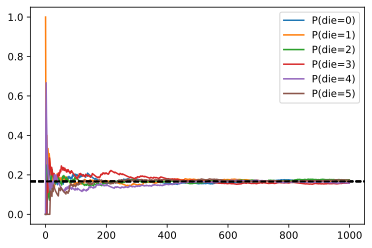

In [10]:
### 각 주사위 눈금이 나올 확률. 샘플링 횟수를 거듭할수록 0.167 값을 향해 균일해짐을 알 수 있다.
set_figsize((6, 4))

for i in range(6):
    plt.plot(estimates[i, :].asnumpy(), label=("P(die=" + str(i) +")"))
    plt.axhline(y=0.16666, color='black', linestyle='dashed')
    plt.legend();

기억해 두어야할 몇가지 중요한 확률에 대한 공리(axiom)--> 공리라기 보다는 정의 및 정의에서 나온 성질이 더 맞다:

* 어떤 사건에 대한 확률값은 절대 음수가 아님. <br> 
  $\Pr(Z=z) \geq 0$. <br><br>
* 두 개의 이벤트 $Z=z$ and $X=x$ 의 합집합에 대한 확률은, 각 이벤트 확률의 합보다 클 수 없다. <br> $\Pr(Z=z \cup X=x) \leq \Pr(Z=z) + \Pr(X=x)$.<br><br>
* 어떤 확률 변수에서, 모든 값들의 확률의 합은 1 <br>
  $\sum_{i=1}^n \Pr(Z=z_i) = 1$.<br><br>
* 상호 베타적인 이벤트 $Z=z$ and $X=x$ 에 대해, 두 이벤트의 합집합에 대한 확률은 각 사건의 확률의 합과 같다, <br> 
  $\Pr(Z=z \cup X=x) = \Pr(Z=z) + \Pr(X=x)$.<br><br>

#### **4.4.2 Dealing with multiple random variables**

- **conditional probability**<br>
  $B$ 가 일어났을 때 $A$가 일어날 확률, $\Pr(A | B)$<br><br>

- **conditional probability 조금 더 자세한 설명** : 사건 $B$가 사실이므로 모든 가능한 표본은 사건 $B$에 포함되어야 한다. **즉, 새로운 실질적 표본공간은  $Ω_{new}$→$𝐵$ 가 된다.**<br>
  새로운 사건 $A_{new}$의 원소는 동시에 $A$, $B$ 사건의 원소가 되야함.($A∩B$) **즉, 새로운 실질적  $ A_{new} $ → $A ∩ B$ 가 된다.**<br><br>
  따라서 $P(A|B)$ 는 사건 $A_{new}$의 확률 즉, $A,B$ 의 결합확률을 새로운 표본공간 $B$ 에서의 확률로 정규화(normalize)한 값이라고 할 수 있다.<br><br>
  $$P(A|B) = \frac{P(A_{new})}{P(Ω_{new})} = \frac{P(A,B)}{P(B)}$$

<img src="img/jc_pb.png">

- **dependence vs. independence**<br>
  독립 사건일 경우 다음 공식이 성립   $$\Pr(A, B) = \Pr(A) \times \Pr(B)$$<br>
  $$\Pr(A | B) = \frac{\Pr(A,B)}{\Pr(B)} = \frac{\Pr(A) \times \Pr(B)} {\Pr(B)} = \Pr(A)$$<br>
  $\Pr(A | B) = \Pr(A)$ 혹은 $\Pr(B | A) = \Pr(B)$ 를 만족하면 --> **_independence_** <br>
  
  위가 아닌 것들은 --> **_dependence_** <br>

- **Bayes’ theorem**<br>
  조건부 확률의 정의를 이용하여 다음 식을 유도할 수 있다.<br><br> 
  $\Pr(A|B) = \frac{\Pr(A,B)}{\Pr(B)}$  ,  $\Pr(B|A) = \frac{\Pr(A,B)}{\Pr(A)}$ <br><br>
  $\Pr(A, B) = \Pr(B | A) \Pr(A)$  ,  $\Pr(A,B) = \Pr(A | B) \Pr(B)$<br>

$$\Pr(A | B) = \frac{\Pr(B | A) \Pr(A)}{\Pr(B)}$$

#### **4.4.3 Conditional independence** 

$D_1$ 와 $D_2$ 사건이, $H$ 사건 하에서 서로 독립인 경우.  <br>
$\Pr(D_1, D_2 | H) = \Pr(D_1 | H) \Pr(D_2 | H)$ 가 성립하면, 이런 확률 변수를 **조건부 독립**이라고 하며, $D_1 \perp\!\!\!\perp D_2  | H$ 라고 표현.

#### **4.4.4 Sampling** 

#### 간단한 분포 소개 및, 어떤 분포를 만들기 위해, 어떻게 샘플링 해야하는지에 대한 내용.####

In [3]:
for i in range(10):
    print(random.random())

0.037154368456901454
0.6560786983788888
0.7681006951249684
0.41554401454021594
0.8660750761844761
0.1739593194841217
0.5415385370226555
0.031014293520779113
0.3350747965419515
0.7923717489051478


- **확률분포**<br>
   확률 변수가 특정한 값을 가질 확률을 나타내는 함수를 의미

##### **Uniform Distribution**

- 확률변수의 값들이 균등한 확률값으로 나오는 분포, 직사각형의 형태가 됨.
- randint 함수를 이용

In [13]:
for i in range(10):
    print(random.randint(1, 100))

50
66
35
45
77
53
84
48
5
17


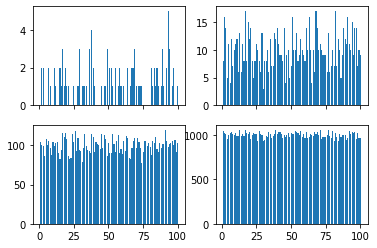

In [2]:
counts = np.zeros(100)
fig, axes = plt.subplots(2, 2, sharex=True)
axes = axes.flatten()

# Mangle subplots such that we can index them in a linear fashion rather than
# a 2D grid
for i in range(1, 100001):
    counts[random.randint(0, 99)] += 1
    
    if i in [100, 1000, 10000, 100000]:
        axes[int(math.log10(i))-2].bar(np.arange(1, 101), counts)

- 초기 값은 매우 불균등함. 수행 횟수가 어느정도 커지면 우리가 예상했던 균일한 분포 모양을 얻을 수 있다.

##### **The categorical distribution**

- 카테고리 분포는 1부터 K까지, K개의 정수 값 중 하나가 나오는 확률 변수의 분포.<br><br>
- 균일하지 않은 분포값의 예제를 위해 구부러진 동전을 던지는 예시를 들기로 함.<br>
  앞면이 나올 확률이 0.35, 뒷면이 나올 확률이 0.65 인 동전이 있다고 가정.<br>
  uniform 한 random 함수를 통해 위와 같은 이벤트를 만들기 위해, 0.35 보다 작으면 동전의 앞면 0.35 보다 같거나 크면 동전의 뒷면이라고 정의.

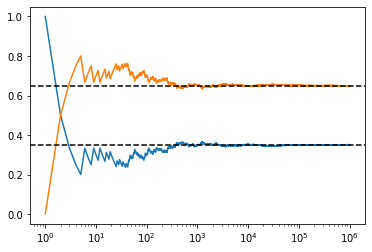

In [32]:
# Number of samples
n = 1000000
y = np.random.uniform(0, 1, n)
#print(y)
x = np.arange(1, n+1)

# Count number of occurrences and divide by the number of total draws
# 앞면
p0 = np.cumsum(y < 0.35) / x
# 뒷면
p1 = np.cumsum(y >= 0.35) / x

plt.semilogx(x, p0)
plt.semilogx(x, p1)
plt.axhline(y=0.35, color='black', linestyle='dashed')
plt.axhline(y=0.65, color='black', linestyle='dashed');

##### **The Normal distribution**

- 표준 정규 분포 (또는 가우시안 분포)는 $p(x) = \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{1}{2} x^2\right)$ 로 정의. 그림으로 확인

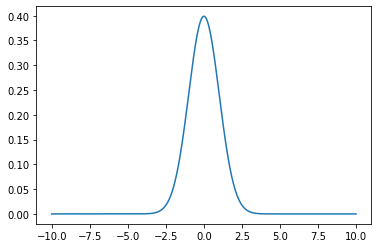

In [4]:
x = np.arange(-10, 10, 0.01)
p = (1/math.sqrt(2 * math.pi)) * np.exp(-0.5 * x**2)
plt.plot(x, p);

정규 분포에는 또 다른 중요한 특성이 있다. <br>
**우리가 다른 분포에서 충분히 많은 수를 샘플링하고 그것의 평균을 구하면 모든 분포가 평균에 수렴.**<br> 
이것을 좀 더 자세히 이해하려면 기대 값, 평균 및 분산이라는 세 가지 중요한 사항을 알 필요가 있다.

**1.** 분포 $p$ 를 따르는 함수 $f$ 에 대한 기대값 $\mathbf{E}_{x \sim p(x)}[f(x)]$  은 적분 $\int_x p(x) f(x) dx$ 으로 계산됨. 
  즉, 이는 $p$ 에 따라 주어지는 모든 결과에 대한 평균값.

**2.** 함수 $f(x) = x$ 에 대한 기대값은 굉장히 중요. 이 함수의 기대값은 $\mu := \mathbf{E}_{x \sim p(x)}[x]$<br> 
  이는 전형적인 $x$ 에 대한 아이디어를 제공해주기 때문 

**3.** 중요한 다른 개념으로는 분산이 있다. 이는 $\sigma^2 := \mathbf{E}_{x \sim p(x)}[(x-\mu)^2]$  으로 표현되며, 평균으로부터 얼마나 떨어져 있는지를 알려줌.<br>
  간단한 계산식으로,  분산은 $\sigma^2 = \mathbf{E}_{x \sim p(x)}[x^2] - \mathbf{E}^2_{x \sim p(x)}[x]$ 로 표현되기도 함.

위의 방법들은 확률 변수의 평균, 분산을 모두 변경할 수 있게 한다.


- **Central Limit Theorem** (중심 극한의 정리 )<br>
  동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리<br>
  아래의 식으로 해당 이론을 알아보려함.

mean 0.9, variance 0.49
[4]


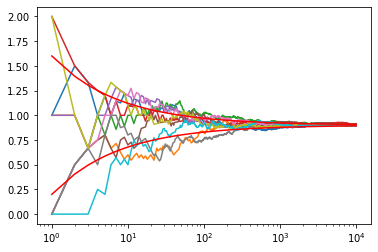

In [27]:
# Generate 10 random sequences of 10,000 uniformly distributed random variables
tmp = np.random.uniform(size=(10000,10))
# print(tmp)

# {0, 1, 2} 의 값들만을 결과로 가지도록 함.
x = 1.0 * (tmp > 0.3) + 1.0 * (tmp > 0.8)
#print(x)

# 위의 샘플링 과정을 거쳤으므로, 확률변수 0, 1, 2 에 대한 확률값을 알고 있다. "1" 의 식과 "2"의 f(x) = x 식을 기반으로 평균을 구함.
mean = 1 * 0.5 + 2 * 0.2

# "3" 의 식을 기반으로 분산을 구함.
variance = 1 * 0.5 + 4 * 0.2 - mean**2
print('mean {}, variance {}'.format(mean, variance))

# Cumulative sum and normalization
y = np.arange(1,10001).reshape(10000,1)
z = np.cumsum(x,axis=0) / y

for i in range(10):
    plt.semilogx(y,z[:,i])

# ?? 10개의 그래프의 ㅇ균 같아 보임...
plt.semilogx(y,(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.semilogx(y,-(variance**0.5) * np.power(y,-0.5) + mean,'r');
# plt.semilogx(y, np.sqrt(variance) * np.power(y,-0.5) + mean,'r')
# plt.semilogx(y, -np.sqrt(variance) * np.power(y,-0.5) + mean,'r')


변수들의 평균만을 보면 처음 예제와 아주 비슷하게 보임.<br>
확률 변수의 평균과 분산은 다음과 같이 표현.

$$\mu[p] := \mathbf{E}_{x \sim p(x)}[x] \text{ 와 } \sigma^2[p] := \mathbf{E}_{x \sim p(x)}[(x - \mu[p])^2]$$

그러면, $\lim_{n\to \infty} \frac{1}{\sqrt{n}} \sum_{i=1}^n \frac{x_i - \mu}{\sigma} \to \mathcal{N}(0, 1)$ 이 됨.<br> 
즉, 어떤 값으로부터 시작했는지 상관없이, 가우시안 분포에 항상 수렴. 이것이 통계에서 가우시안 분포가 유명한 이유들 중에 하나.

##### **More distributions**


* **이항 분포(Binomial Distribution)** 같은 분포에서 여러번 뽑을 때의 분포를 설명하는데 사용됨 <br>
  즉, 편향된 동전(동전 앞면이 나올 확률이 $\pi \in [0, 1]$ 인 동전을 사용할 때)을 10번 던져서 앞면이 나오는 횟수. <br>
  분포는  $p(x) = {n \choose x} \pi^x (1-\pi)^{n-x}$<br><br>
* **다항 분포(Multinomial Distribution)** 두개보다 많은 결과가 있을 경우에 해당. <br>
  즉, 주사위를 여러번 던지는 경우를 예로 들 수 있습니다. 이 경우 분포는 $p(x) = \frac{n!}{\prod_{i=1}^k x_i!} \prod_{i=1}^k \pi_i^{x_i}​$ 로 주어짐.<br><br>
* **포아송 분포(Poisson Distribution)** 주어진 속도(rate)에 따라서 일어나는 이벤트를 모델링할 때 사용됨. <br>
  예를 들면, 어느 공간에 일정 시간 동안 떨어지는 빗방울의 수가 됨. (특이한 사실은, 프러시안 군인들이 말의 발길에 치여서 죽은 수가 이 분포를 따르고 있다.)<br> 
  속도 $\lambda$ 에 대해서, 일이 일어날 확률은 $p(x) = \frac{1}{x!} \lambda^x e^{-\lambda}$ 로 표현됩니다.<br><br>
* **베타, 디리치(Dirichlet), 감마, 위샤트(Wishart) 분포** 통계학자들은 이것들을 각각 이산, 다항, 포아송, 그리고 가우시안 분포의 변종이라고 설명하고 있다.<br>
  이 분포들은 분포들의 집합에 대한 계수를 위한 사전 순위로 사용되는데, 자세한 설명은 생략. 이산 결과들의 확률을 모델링하는데 사전 순위로의 베타 분포 같은 것.

___